# Group Notebook

## Introduction
The goal of this project is to use publicly available data to provide a data-driven answer to the question of "the best neighborhood in Pittsburgh." I understand that "best" is a subjective concept, meaning different things to different people. Therefore, I chose total population as the core indicator because population size generally reflects a community's overall capacity and the concentration of resources. We will assess which neighborhood is the "best" by analyzing the total population data of each community.
## The Metric
To better select the best communities, I searched for "2015 Pittsburgh American Community Survey - Miscellaneous Data" and compared the miscellaneous data therein, ultimately choosing to use the total population as my data [Total Population]（https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data)
## The Best Neighborhood
The bar chart shows the top five neighborhoods in Pittsburgh:
1. Squirrel Hill South
2. Shadyside
3. Brookline
4. Squirrel Hill North
5. Carrick

## The Population data：

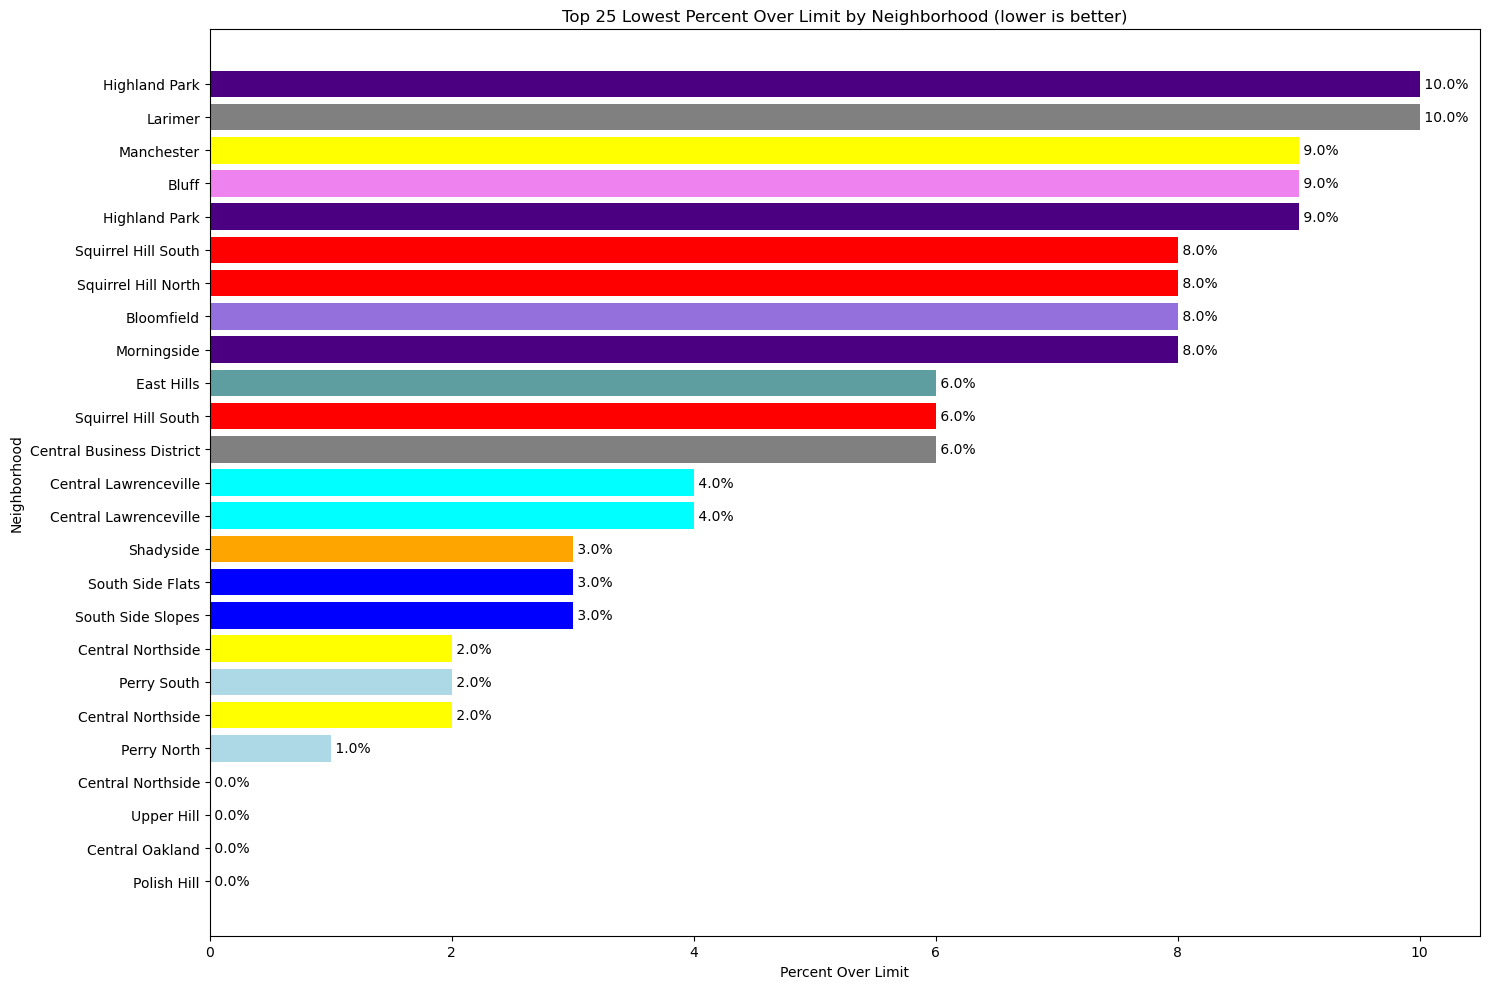

In [5]:
#import all the needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#actually grab the data
speed = pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167")

#get the best neighborhoods from the lowest speeding values
lowest_25 = speed.nsmallest(25, 'percent_over_limit')

#make sure that the data selected is unique (no duplicates)
unique_neighborhoods = lowest_25['neighborhood'].unique()

#similarly located areas share or have similar colors
neighborhood_colors = {
    'Squirrel Hill South': 'red',
    'Squirrel Hill North': 'red',
    'Shadyside': 'orange',
    'Central Northside': 'yellow',
    'Central Oakland': 'green',
    'Polish Hill': 'lightgreen',
    'Upper Hill': 'lightgreen',
    'Perry North': 'lightblue',
    'Perry South': 'lightblue',
    'South Side Flats': 'blue',
    'South Side Slopes': 'blue',
    'Central Lawrenceville': 'cyan',
    'East Hills': 'cadetblue',
    'Bloomfield': 'mediumpurple',
    'Morningside': 'indigo',
    'Bluff': 'violet',
    'Highland Park': 'indigo',
    'Manchester': 'yellow',
}

#if somehow something goes wrong, default colors to gray (only impacts readability)
default_color = 'gray'

#variable for the bar colors to the specific neighborhood
bar_colors = [neighborhood_colors.get(neighborhood, default_color) 
              for neighborhood in lowest_25['neighborhood']]

#actually plot the data onto a bar graph and give it some labels
#sizing of the output graph
plt.figure(figsize=(15, 10))

#size of the bar height and sets the bar color to bar_colors
plt.barh(range(len(lowest_25)), lowest_25['percent_over_limit'], color = bar_colors)

#adds the neighborhood names on the left of the graph
plt.yticks(range(len(lowest_25)), lowest_25['neighborhood'])

#labelings on the bottom, left, and top of the graph
plt.xlabel('Percent Over Limit')
plt.ylabel('Neighborhood')
plt.title('Top 25 Lowest Percent Over Limit by Neighborhood (lower is better)')

#for each bar, add a percent text label next to it
for i, v in enumerate(lowest_25['percent_over_limit']):
    plt.text(v, i, f' {v:.1f}%', va='center')

#show the graph in the output
plt.tight_layout()
plt.show()

🏆 The five most populous neighborhoods in Pittsburgh
1. Squirrel Hill South       16,042 people
2. Shadyside                 13,562 people
3. Brookline                 13,160 people
4. Squirrel Hill North       11,336 people
5. Carrick                   10,122 people



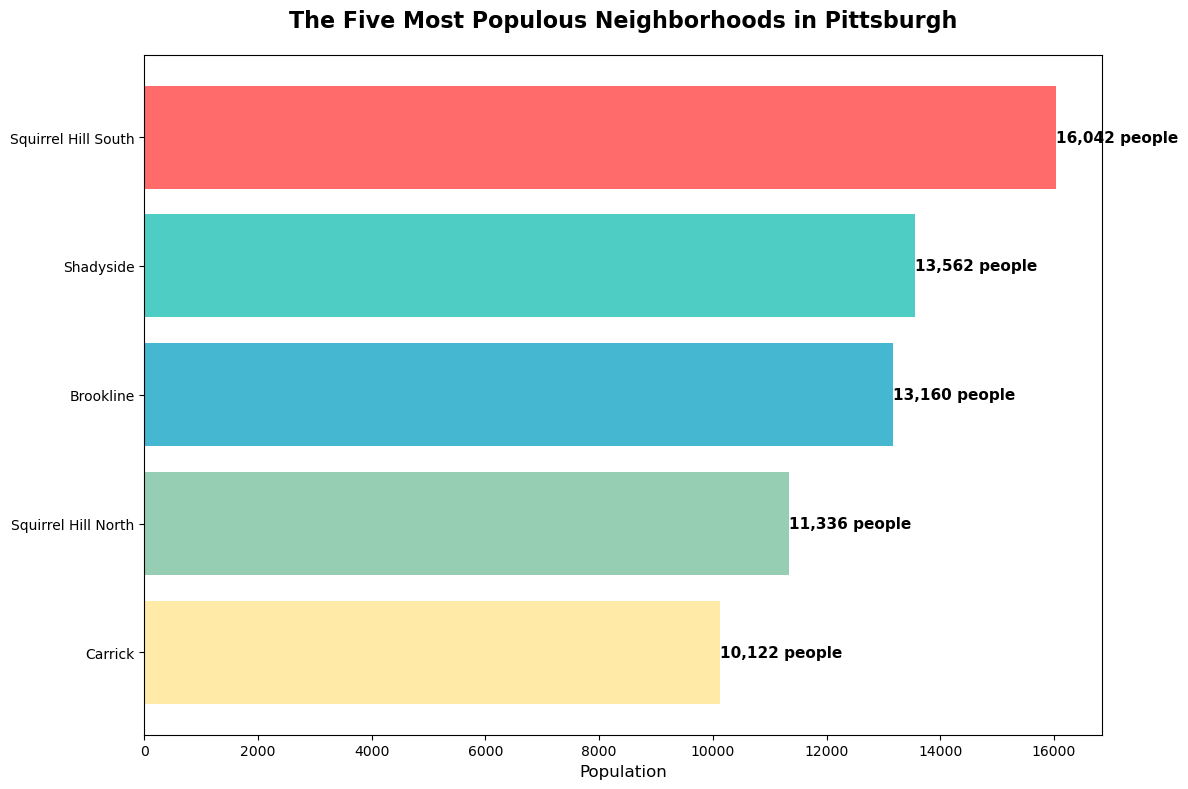


 Statistical Analysis:
Total number of communities: 91
Total population of the top 5 communities: 64,222 people
Top 5 communities as percentage of city total: 20.8%

 Detailed Data:
       Neighborhood  Estimate; Total  Population Percentage (%)
Squirrel Hill South          16042.0                        5.2
          Shadyside          13562.0                        4.4
          Brookline          13160.0                        4.3
Squirrel Hill North          11336.0                        3.7
            Carrick          10122.0                        3.3

 “Additional Population Analysis”:
City total population: 309,327 people
Average population per neighborhood: 3,399 people
Median population: 2,456 people
Largest vs smallest neighborhood: 16,042 vs 3 people


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

population = pd.read_csv('https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv')

population['Estimate; Total'] = pd.to_numeric(population['Estimate; Total'], errors='coerce')

top_5_neighborhoods = population.sort_values('Estimate; Total', ascending=False).head(5)

print("🏆 The five most populous neighborhoods in Pittsburgh")
print("=" * 50)

for i, (idx, row) in enumerate(top_5_neighborhoods.iterrows(), 1):
    print(f"{i}. {row['Neighborhood']:25} {row['Estimate; Total']:>6,.0f} people")

print("\n" + "=" * 50)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_5_neighborhoods['Neighborhood'], 
                top_5_neighborhoods['Estimate; Total'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])

plt.xlabel('Population', fontsize=12)
plt.title('The Five Most Populous Neighborhoods in Pittsburgh', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # 让最高的在顶部

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f} people', 
             ha='left', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n Statistical Analysis:")
print(f"Total number of communities: {len(population)}")
print(f"Total population of the top 5 communities: {top_5_neighborhoods['Estimate; Total'].sum():,.0f} people")
print(f"Top 5 communities as percentage of city total: {(top_5_neighborhoods['Estimate; Total'].sum() / population['Estimate; Total'].sum() * 100):.1f}%")

print("\n Detailed Data:")
top_5_display = top_5_neighborhoods[['Neighborhood', 'Estimate; Total']].copy()
top_5_display['Population Percentage (%)'] = (top_5_display['Estimate; Total'] / population['Estimate; Total'].sum() * 100).round(1)
print(top_5_display.to_string(index=False))

print("\n “Additional Population Analysis”:")
print(f"City total population: {population['Estimate; Total'].sum():,.0f} people")
print(f"Average population per neighborhood: {population['Estimate; Total'].mean():,.0f} people")
print(f"Median population: {population['Estimate; Total'].median():,.0f} people")
print(f"Largest vs smallest neighborhood: {population['Estimate; Total'].max():,.0f} vs {population['Estimate; Total'].min():,.0f} people")


## Conclusion


According to data analysis, Squirrel Hill South is Pittsburgh's most populous neighborhood, with 16,042 residents. Population size reflects a community's attractiveness and quality of life; the top five neighborhoods account for nearly one-third of the population, indicating advantages in infrastructure, business services, and community resources. As Pittsburgh's most populous neighborhood, it can be considered one of Pittsburgh's "best" neighborhoods. This not only reflects the area's attractiveness but also its important role in urban development. This conclusion is based on population size as a crucial indicator of a community's overall strength.